In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import math
import random

In [3]:
n = 1
x = np.random.uniform(1, 2, 1000)
y = x.copy()

# PCA works better if the data is centered
x = x - np.mean(x)
y = y - np.mean(y)

data = pd.DataFrame(data = {'x' : x, 'y' : y})
data

,x,y
0,-0.491201,-0.491201
1,-0.041664,-0.041664
2,0.365980,0.365980
3,0.179444,0.179444
4,0.142400,0.142400
...,...,...
995,0.212654,0.212654
996,0.497776,0.497776
997,-0.194034,-0.194034
998,-0.490110,-0.490110


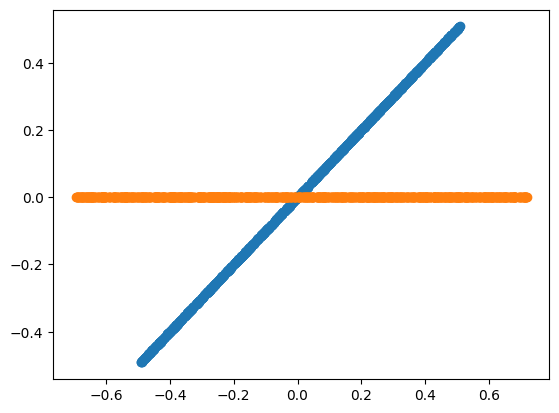

In [7]:
n = 1  # The amount of the correlation
x = np.random.uniform(1,2,1000) # Generate 1000 samples from a uniform random variable
y = x.copy() * n # Make y = n * x

# PCA works better if the data is centered
x = x - np.mean(x) # Center x. Remove its mean
y = y - np.mean(y) # Center y. Remove its mean

data = pd.DataFrame({'x': x, 'y': y}) # Create a data frame with x and y
plt.scatter(data.x, data.y) # Plot the original correlated data in blue

pca = PCA(n_components=2) # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally, it gets the rotation 
# matrix and the explained variance
pcaTr = pca.fit(data)

rotatedData = pcaTr.transform(data) # Transform the data base on the rotation matrix of pcaTr
# # Create a data frame with the new variables. We call these new variables PC1 and PC2
dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2']) 

# Plot the transformed data in orange
plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.show()

#### Understanding the transformation model pcaTr
- PCA model is composed of a rotation matrix and its corresponding expained variance. 
- pcaTr.components_ has the rotation matrix
- pcaTr.explained_variance_ has the explained variance of each principal component

In [8]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

random.seed(100)

std1 = 1     # The desired standard deviation of our first random variable
std2 = 0.333 # The desired standard deviation of our second random variable

In [9]:
x = np.random.normal(0, std1, 1000) # Get 1000 samples from x ~ N(0, std1)
y = np.random.normal(0, std2, 1000)  # Get 1000 samples from y ~ N(0, std2)
#y = y + np.random.normal(0,1,1000)*noiseLevel * np.sin(0.78)

In [10]:
# PCA works better if the data is centered
x = x - np.mean(x) # Center x 
y = y - np.mean(y) # Center y

In [11]:
#Define a pair of dependent variables with a desired amount of covariance
n = 1 # Magnitude of covariance. 
angle = np.arctan(1 / n) # Convert the covariance to and angle
print('angle: ',  angle * 180 / math.pi)

angle:  45.0


rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


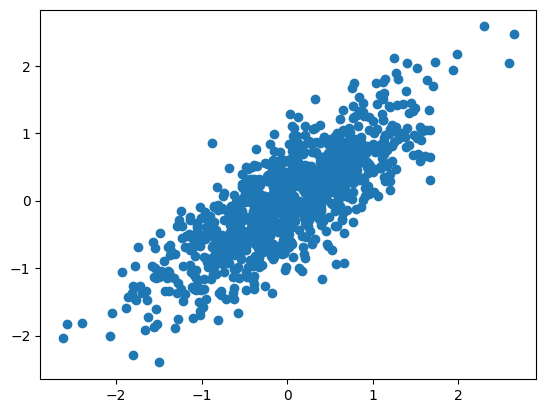

In [13]:
# Create a rotation matrix using the given angle
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
                 [-np.sin(angle), np.cos(angle)]])


print('rotationMatrix')
print(rotationMatrix)

xy = np.concatenate(([x] , [y]), axis=0).T # Create a matrix with columns x and y

# Transform the data using the rotation matrix. It correlates the two variables
data = np.dot(xy, rotationMatrix) # Return a nD array

# Print the rotated data
plt.scatter(data[:,0], data[:,1])
plt.show()


Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.71439869  0.69973889]
 [-0.69973889  0.71439869]]

Eigenvalues or explained variance
[1.02146149 0.11575235]


C:\Users\Duc Anh\AppData\Local\Temp\ipykernel_21164\1540591202.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
C:\Users\Duc Anh\AppData\Local\Temp\ipykernel_21164\1540591202.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')


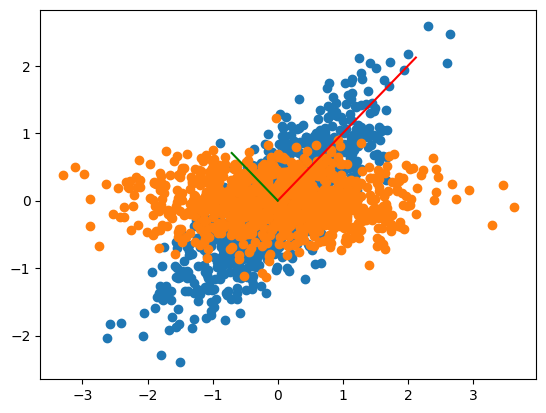

In [14]:
plt.scatter(data[:,0], data[:,1]) # Print the original data in blue

# Apply PCA. In theory, the Eigenvector matrix must be the 
# inverse of the original rotationMatrix. 
pca = PCA(n_components=2)  # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally it gets the rotation 
# matrix and the explained variance
pcaTr = pca.fit(data)

# Create an array with the transformed data
dataPCA = pcaTr.transform(data)

print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

# Print the rotated data
plt.scatter(dataPCA[:,0], dataPCA[:,1])

# Plot the first component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
# Plot the second component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')

plt.show()

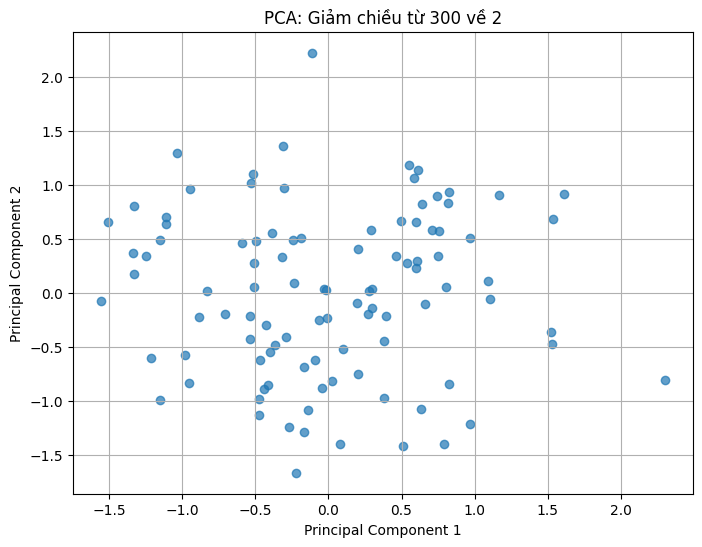

In [18]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Giả sử bạn có một mảng numpy với các vector 300 chiều
# Dữ liệu mẫu: 100 vector, mỗi vector có 300 chiều
vectors = np.random.rand(100, 300)  

# Khởi tạo PCA để giảm về 2 chiều
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Vẽ lên đồ thị 2D
plt.figure(figsize=(8, 6))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.7)
plt.title('PCA: Giảm chiều từ 300 về 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


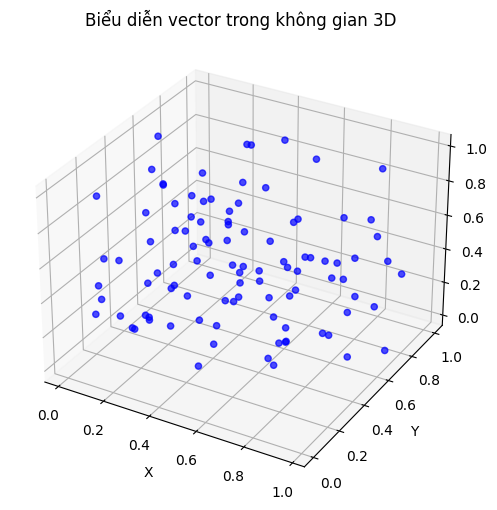

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Giả sử bạn có 100 vector, mỗi vector có 3 chiều
vectors = np.random.rand(100, 3)  # Thay bằng dữ liệu thật của bạn

# Tách từng trục
x = vectors[:, 0]
y = vectors[:, 1]
z = vectors[:, 2]

# Tạo figure 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Vẽ scatter
ax.scatter(x, y, z, c='blue', marker='o', alpha=0.7)

# Đặt nhãn trục
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Biểu diễn vector trong không gian 3D')

plt.show()
